<h4>Defining a Contrarian Momentum Strategy - Daily</h4> 
<h6>Is an investment style in which investors purposefully go against prevailing market<br>trends by selling when others are buying and buying when most investors are selling.</h6>

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Load data
def load_data(ticker: str, time_frame: str) -> None:
    ticket = yf.Ticker(f'{ticker}')
    dataset = ticket.history(period='max', interval=time_frame, auto_adjust=True).drop(columns=['Volume', 'Dividends', 'Stock Splits']).rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'}) # periods: “1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max”
    dataset['date'] = dataset.index
    return pd.DataFrame(dataset)

ticker = 'EURUSD=X'
time_frame = '1d'
data = load_data(ticker, time_frame)

<h4>Plot Close Price</h4>

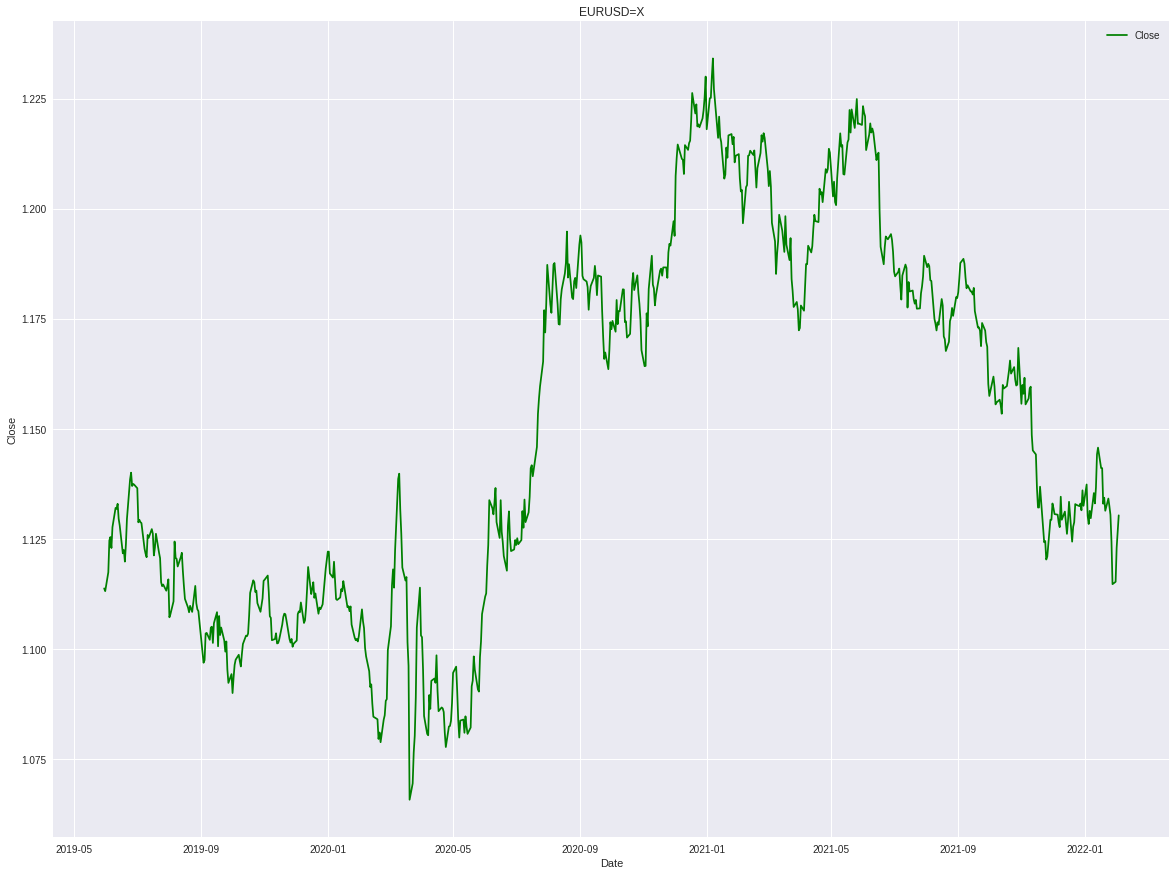

In [3]:
plt.figure(figsize=(20,15))
plt.title(ticker)
plt.plot(data['close'].tail(700), color='g', label='Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

<h4>Create variables</h4>
<h6>Create variables that exhibit returns.</h6>

In [17]:
data['returns'] = np.log(data['close'] / data['close'].shift(1))
data['returns'].rolling(3).mean()
data['position'] = -np.sign(data['returns'].rolling(3).mean()) # contrarian (minus sign)
data.dropna(inplace=True)
data

,open,high,low,close,date,returns,position
Date,,,,,,,
2003-12-12,1.222703,1.230603,1.221300,1.227898,2003-12-12,0.004484,-1.0
2003-12-15,1.218695,1.232499,1.217804,1.231997,2003-12-15,0.003333,-1.0
2003-12-16,1.231406,1.235895,1.230497,1.232195,2003-12-16,0.000160,-1.0
2003-12-17,1.231997,1.242005,1.229997,1.240202,2003-12-17,0.006478,-1.0
2003-12-18,1.240202,1.244199,1.236598,1.242298,2003-12-18,0.001688,-1.0
...,...,...,...,...,...,...,...
2022-01-27,1.124227,1.124480,1.113350,1.124354,2022-01-27,-0.005411,1.0
2022-01-28,1.114616,1.117006,1.112335,1.114703,2022-01-28,-0.008620,1.0
2022-01-31,1.115138,1.121692,1.114504,1.115237,2022-01-31,0.000479,1.0
